In [1]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-a6j9gbce
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-a6j9gbce
  Resolved https://github.com/albumentations-team/albumentations to commit 2a1826d49c9442ae28cf33ddef658c8e24505cf8


In [3]:
import sys 
sys.path.append('data')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch 
import timm

import torch.nn.functional as F 
from torch import nn 
from torch.utils.data import Dataset, DataLoader 

from skimage import io
from sklearn.model_selection import train_test_split 

from tqdm import tqdm 

/home/ubuntu/anaconda3/lib/python3.8/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)


In [5]:
data_dir = "data/train/"
csv_file = "data/train.csv"

df = pd.read_csv(csv_file)
df.head()

,Anchor,Negative,Positive
0,1420_c5s3_052165_01.jpg,1334_c6s3_061492_05.jpg,1420_c3s3_051678_01.jpg
1,1420_c3s3_061978_03.jpg,0234_c3s3_079494_02.jpg,1420_c6s3_085567_02.jpg
2,1420_c5s3_062565_05.jpg,0475_c2s1_122816_08.jpg,1420_c3s3_051653_01.jpg
3,1420_c6s3_085592_04.jpg,0662_c2s2_036662_05.jpg,1420_c1s6_013446_04.jpg
4,0663_c5s3_085987_03.jpg,1463_c2s3_098102_02.jpg,0663_c3s3_085544_06.jpg


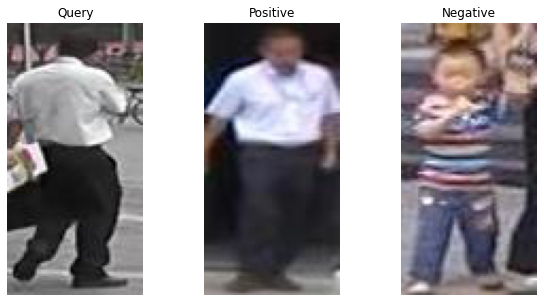

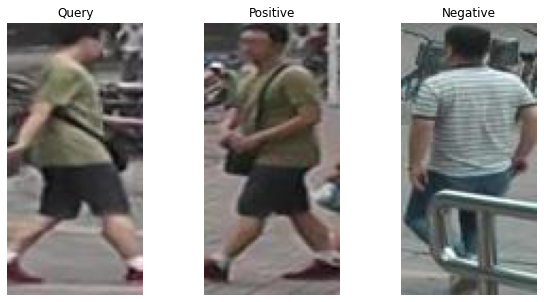

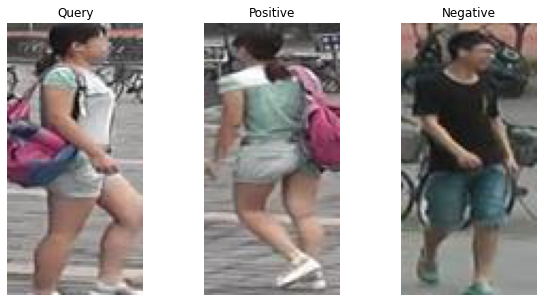

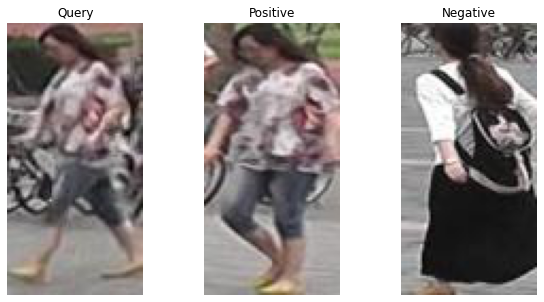

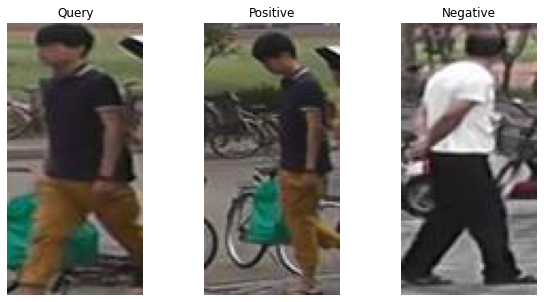

In [32]:
def plot_ims(df, num_samples=5):
    
    for _ in range(num_samples):
        
        idx = int(np.random.randint(low=0, high=len(df), size=1))
        example = df.iloc[idx]
        qry_img = io.imread(data_dir + example.Anchor)
        pos_img = io.imread(data_dir + example.Positive)
        neg_img = io.imread(data_dir + example.Negative)
        f, (ax1, ax2, ax3) = plt.subplots(1, len(example), figsize=(10,5))

        ax1.set_title("Query")
        ax1.imshow(qry_img)
        ax1.axis('off')

        ax2.set_title("Positive")
        ax2.imshow(pos_img)
        ax2.axis('off')

        ax3.set_title("Negative")
        ax3.imshow(neg_img)
        ax3.axis('off')
        
plot_ims(df)